<a href="https://colab.research.google.com/github/berthe06/projetmgl870/blob/main/PROJETMGl870.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Partie I: Preparation des données**



In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
### Importation des bibliothèques générales que nous utiliserons dans ce notebook
import numpy as np # algèbre linéaire
import pandas as pd # traitement des données, I/O de fichier CSV (par ex. pd.read_csv)
import seaborn as sns # bibliothèque de tracé qui utilise matplot
import matplotlib.pyplot as plt # pour tracer certains paramètres dans seaborn
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


# Importer LabelEncoder depuis sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import pandas as pd

# Importer

import matplotlib.pyplot as plt
import numpy as np




# Chargement des données
df = pd.read_csv('/content/drive/MyDrive/TP2MGL870/HDFS/log_structured.csv')



df.head()

,DateTime,Severity,EpochTime,Content,UUID,EventId,EventTemplate
0,2024-12-17 17:32:16,INFO,2024-12-17 17:32:16,Starting ProductServiceApplication using Java ...,NaN,E2,Starting ProductServiceApplication using Java ...
1,2024-12-17 17:32:16,INFO,2024-12-17 17:32:16,No active profile set,NaN,E3,No active profile set
2,2024-12-17 17:32:16,DEBUG,2024-12-17 17:32:16,Loading source class com.projetmgl870.microser...,NaN,E4,Loading source class com.projetmgl870.microser...
3,2024-12-17 17:32:16,DEBUG,2024-12-17 17:32:16,Refreshing org.springframework.boot.web.servle...,NaN,E5,Refreshing <*>
4,2024-12-17 17:32:17,INFO,2024-12-17 17:32:17,Bootstrapping Spring Data MongoDB repositories...,NaN,E6,Bootstrapping Spring Data MongoDB repositories...


In [ ]:
# 1. Preparation des donnees
#Encodage des Étiquettes de Succès/Échec


# Encodage de la colonne "Label"
df['Severity'] = df['Severity'].map({'INFO': 0, 'DEBUG': 1,'WARN': 2})


print(df)

                  DateTime  Severity            EpochTime  \
0      2024-12-17 17:32:16         0  2024-12-17 17:32:16   
1      2024-12-17 17:32:16         0  2024-12-17 17:32:16   
2      2024-12-17 17:32:16         1  2024-12-17 17:32:16   
3      2024-12-17 17:32:16         1  2024-12-17 17:32:16   
4      2024-12-17 17:32:17         0  2024-12-17 17:32:17   
...                    ...       ...                  ...   
94850  2024-12-20 08:42:39         1  2024-12-20 08:42:39   
94851  2024-12-20 08:42:39         1  2024-12-20 08:42:39   
94852  2024-12-20 08:42:39         1  2024-12-20 08:42:39   
94853  2024-12-20 08:42:39         1  2024-12-20 08:42:39   
94854  2024-12-20 08:42:39         1  2024-12-20 08:42:39   

                                                 Content  UUID EventId  \
0      Starting ProductServiceApplication using Java ...   NaN      E2   
1                                  No active profile set   NaN      E3   
2      Loading source class com.projetmgl870.

In [ ]:
# 2.
print(df.columns)  # Affiche toutes les colonnes du DataFrame
# print(df.dtypes)   # Affiche les types de chaque colonne



Index(['DateTime', 'Severity', 'EpochTime', 'Content', 'UUID', 'EventId',
       'EventTemplate'],
      dtype='object')


Valeurs manquantes par colonne:
 DateTime             0
Severity             0
EpochTime            0
Content              0
UUID             94855
EventId              0
EventTemplate        0
dtype: int64

Visualisation des valeurs manquantes:


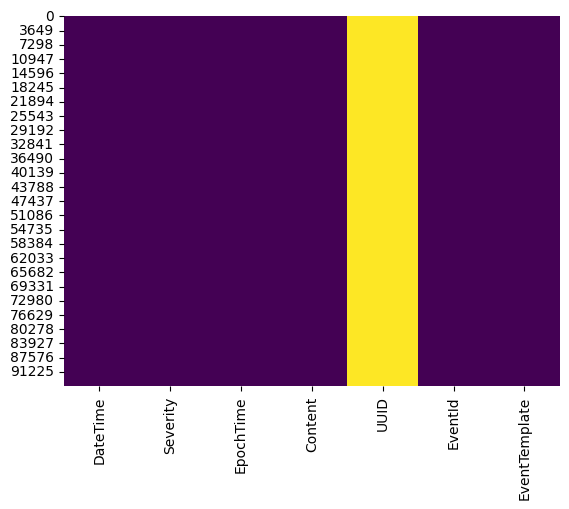

In [ ]:
# 3. Vérifier s'il existe des valeurs manquantes

# a. Utiliser isnull() et sum()
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne:\n", missing_values)

# b. Utiliser heatmap() de seaborn
print("\nVisualisation des valeurs manquantes:")
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.show()

In [ ]:
# 4. Supprimer la colonne 'UUID'

#df = df.drop(columns=['UUID'])
# Afficher le DataFrame transformé
print(df)

                  DateTime  Severity            EpochTime  \
0      2024-12-17 17:32:16         0  2024-12-17 17:32:16   
1      2024-12-17 17:32:16         0  2024-12-17 17:32:16   
2      2024-12-17 17:32:16         1  2024-12-17 17:32:16   
3      2024-12-17 17:32:16         1  2024-12-17 17:32:16   
4      2024-12-17 17:32:17         0  2024-12-17 17:32:17   
...                    ...       ...                  ...   
94850  2024-12-20 08:42:39         1  2024-12-20 08:42:39   
94851  2024-12-20 08:42:39         1  2024-12-20 08:42:39   
94852  2024-12-20 08:42:39         1  2024-12-20 08:42:39   
94853  2024-12-20 08:42:39         1  2024-12-20 08:42:39   
94854  2024-12-20 08:42:39         1  2024-12-20 08:42:39   

                                                 Content  UUID EventId  \
0      Starting ProductServiceApplication using Java ...   NaN      E2   
1                                  No active profile set   NaN      E3   
2      Loading source class com.projetmgl870.

              DateTime Severity            EpochTime  \
0  2024-12-17 17:32:16     INFO  2024-12-17 17:32:16   
1  2024-12-17 17:32:16     INFO  2024-12-17 17:32:16   
2  2024-12-17 17:32:16    DEBUG  2024-12-17 17:32:16   
3  2024-12-17 17:32:16    DEBUG  2024-12-17 17:32:16   
4  2024-12-17 17:32:17     INFO  2024-12-17 17:32:17   

                                             Content  UUID EventId  \
0  Starting ProductServiceApplication using Java ...   NaN      E2   
1                              No active profile set   NaN      E3   
2  Loading source class com.projetmgl870.microser...   NaN      E4   
3  Refreshing org.springframework.boot.web.servle...   NaN      E5   
4  Bootstrapping Spring Data MongoDB repositories...   NaN      E6   

                                       EventTemplate  
0  Starting ProductServiceApplication using Java ...  
1                              No active profile set  
2  Loading source class com.projetmgl870.microser...  
3                     

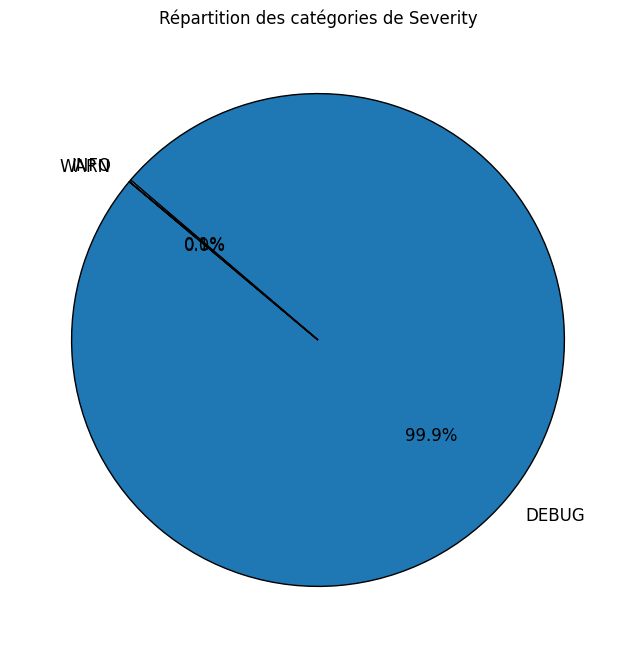

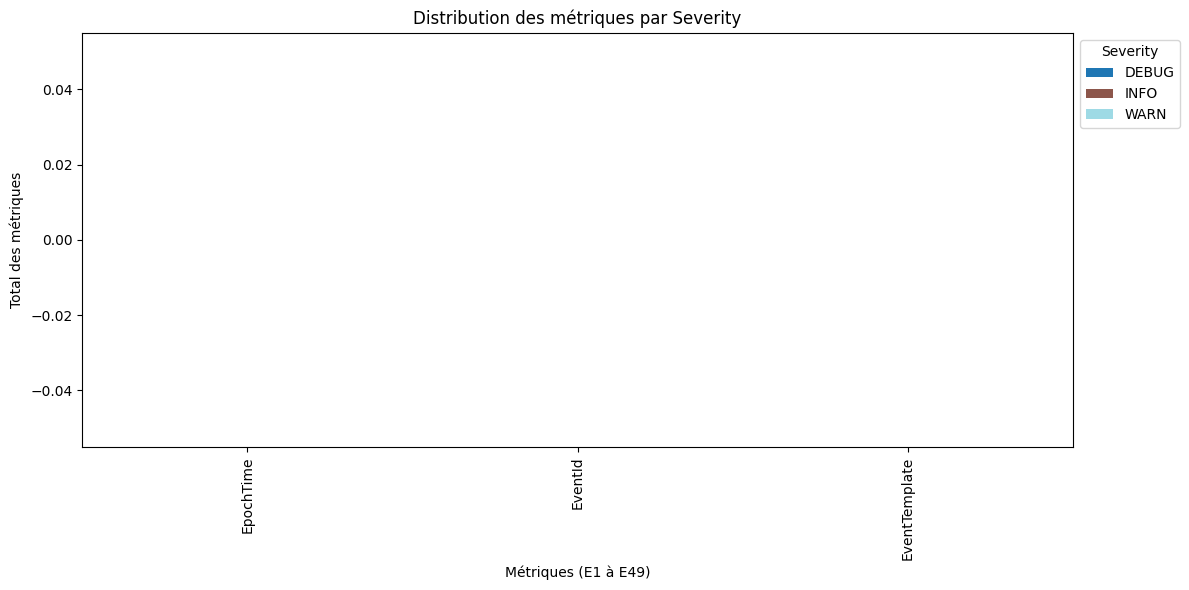

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement des données
df = pd.read_csv('/content/drive/MyDrive/TP2MGL870/HDFS/log_structured.csv')

# Vérification des données
print(df.head())

# 5. Analyse des distributions

# Quelle est la distribution de la variable `Severity`?
print(df['Severity'].value_counts())

# Agréger les données par 'Severity'
metrics_columns = [col for col in df.columns if col.startswith('E')]
aggregated = df.groupby('Severity')[metrics_columns].sum()

# Vérifier les types de données des colonnes de métriques
print(aggregated.dtypes)

# Convertir les colonnes en types numériques si nécessaire
for col in metrics_columns:
    aggregated[col] = pd.to_numeric(aggregated[col], errors='coerce')

# Vérifier et imputer les valeurs manquantes
aggregated = aggregated.fillna(0)

# Vérifier les types de données après conversion
print(aggregated.dtypes)

# Calculer la répartition globale des `Severity`
label_counts = df['Severity'].value_counts(normalize=True) * 100

# Tracer le camembert pour les `Severity` avec des contours
plt.figure(figsize=(8, 8))
colors = sns.color_palette("tab20", len(label_counts))  # Utiliser une palette de couleurs distinctes
wedges, texts, autotexts = plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

# Ajuster les propriétés des textes pour améliorer la lisibilité
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(12)

plt.title("Répartition des catégories de Severity")
plt.show()

# Tracer un diagramme empilé pour les métriques par `Severity`
aggregated.T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="tab20")
plt.title("Distribution des métriques par Severity")
plt.ylabel("Total des métriques")
plt.xlabel("Métriques (E1 à E49)")
plt.legend(title="Severity", loc="upper left", bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()


In [ ]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Chargement des données
df = pd.read_csv('/content/drive/MyDrive/TP2MGL870/HDFS/log_structured.csv')

# Vérification des données
print(df.head())

# Identifier les colonnes d'événements
event_columns = [col for col in df.columns if col.startswith('E')]

# Vérifier les types de données des colonnes d'événements
print(df[event_columns].dtypes)

# Convertir les colonnes en types numériques si nécessaire
for col in event_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Vérifier les types de données après conversion
print(df[event_columns].dtypes)

# Imputer les valeurs manquantes
df[event_columns] = df[event_columns].fillna(0)

# Standardisation des colonnes d'événements
scaler = StandardScaler()
df[event_columns] = scaler.fit_transform(df[event_columns])

# Encoder les valeurs catégorielles de `Severity`
label_encoder = LabelEncoder()
df['Severity'] = label_encoder.fit_transform(df['Severity'])

# Calcul de la matrice de corrélation
correlation_matrix = df[event_columns + ['Severity']].corr()

# Affichage des corrélations avec l'étiquette "Severity"
correlation_with_label = correlation_matrix['Severity'].sort_values(ascending=False)
print(correlation_with_label)


              DateTime Severity            EpochTime  \
0  2024-12-17 17:32:16     INFO  2024-12-17 17:32:16   
1  2024-12-17 17:32:16     INFO  2024-12-17 17:32:16   
2  2024-12-17 17:32:16    DEBUG  2024-12-17 17:32:16   
3  2024-12-17 17:32:16    DEBUG  2024-12-17 17:32:16   
4  2024-12-17 17:32:17     INFO  2024-12-17 17:32:17   

                                             Content  UUID EventId  \
0  Starting ProductServiceApplication using Java ...   NaN      E2   
1                              No active profile set   NaN      E3   
2  Loading source class com.projetmgl870.microser...   NaN      E4   
3  Refreshing org.springframework.boot.web.servle...   NaN      E5   
4  Bootstrapping Spring Data MongoDB repositories...   NaN      E6   

                                       EventTemplate  
0  Starting ProductServiceApplication using Java ...  
1                              No active profile set  
2  Loading source class com.projetmgl870.microser...  
3                     

               Severity  EpochTime  UUID  EventId  EventTemplate
Severity            1.0        NaN   NaN      NaN            NaN
EpochTime           NaN        NaN   NaN      NaN            NaN
UUID                NaN        NaN   NaN      NaN            NaN
EventId             NaN        NaN   NaN      NaN            NaN
EventTemplate       NaN        NaN   NaN      NaN            NaN


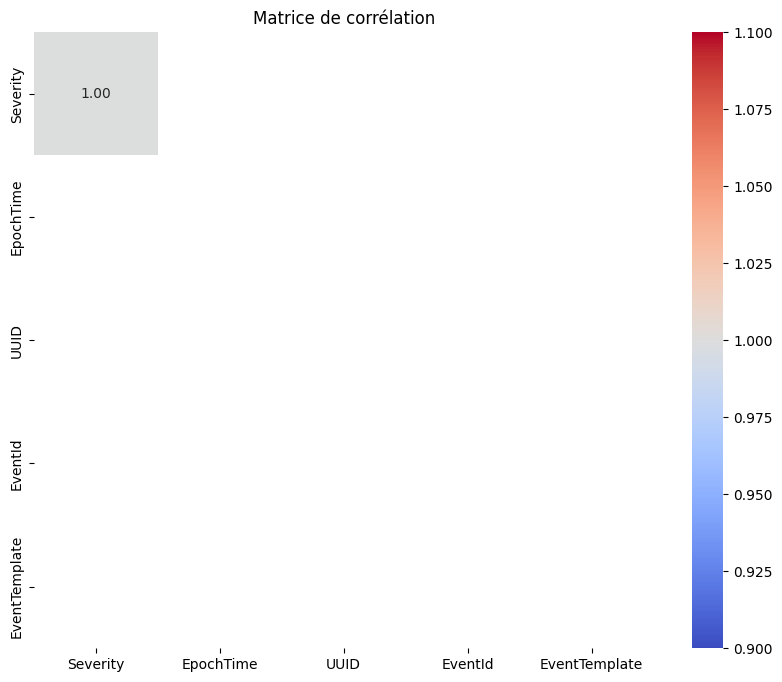

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les colonnes numériques
df_numeric = df.select_dtypes(include=[float, int])

# Gérer les valeurs manquantes, ici on remplace les NaN par la moyenne
df_filled = df_numeric.fillna(df_numeric.mean())

# Calculer la matrice de corrélation
corr_matrix = df_filled.corr()


# Affichage de la matrice de corrélation
print(corr_matrix)

# Création de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Ajouter un titre
plt.title("Matrice de corrélation")
plt.show()


# Exemple de visualisation avec seaborn
#plt.figure(figsize=(12, 8))
#sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
#plt.title("Matrice de Corrélation")
#plt.show()



In [ ]:
# Liste des colonnes à supprimer
colonnes_a_supprimer = ['EpochTime','UUID','EventTemplate']

# Supprimer les colonnes
df = df.drop(columns=colonnes_a_supprimer)

# Afficher les premières lignes pour vérifier
print(df.head())

# Sauvegarder le dataset modifié si nécessaire
df.to_csv('/content/drive/MyDrive/TP2MGL870/HDFS/dataset_modifie.csv', index=False)


              DateTime  Severity  \
0  2024-12-17 17:32:16         1   
1  2024-12-17 17:32:16         1   
2  2024-12-17 17:32:16         0   
3  2024-12-17 17:32:16         0   
4  2024-12-17 17:32:17         1   

                                             Content  EventId  
0  Starting ProductServiceApplication using Java ...      0.0  
1                              No active profile set      0.0  
2  Loading source class com.projetmgl870.microser...      0.0  
3  Refreshing org.springframework.boot.web.servle...      0.0  
4  Bootstrapping Spring Data MongoDB repositories...      0.0  


In [ ]:
# Importation des bibliothèques
import pandas as pd

# Chargement des données
df = pd.read_csv('/content/drive/MyDrive/TP2MGL870/HDFS/dataset_modifie.csv')

# Identifier les colonnes d'événements
event_columns = [col for col in df.columns if col.startswith('E')]

# Séparer les features (X) et la cible (y)
X = df[event_columns]  # Utiliser uniquement les colonnes d'événements comme features
y = df['Severity']  # Utiliser la colonne `Severity` comme cible

# Vérifiez les données
print(X.head())
print(y.head())



   EventId
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
0    1
1    1
2    0
3    0
4    1
Name: Severity, dtype: int64


# **Partie II: Construction du modèle**

In [ ]:
# Importation des bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Chargement des données
df = pd.read_csv('/content/drive/MyDrive/TP2MGL870/HDFS/dataset_modifie.csv')

# Étape 1 : Identifier les colonnes valides (événements) et exclure les colonnes non numériques
event_columns = [col for col in df.columns if col.startswith('S') and col not in ['EpochTime', 'EventId', 'EventTemplate']]

# Vérification des colonnes valides
if not event_columns:
    raise ValueError("Aucune colonne d'événement valide n'est disponible. Vérifiez vos données.")
else:
    print(f"Colonnes d'événements utilisées : {event_columns}")

# Caractéristiques et étiquette
X = df[event_columns]  # Colonnes des événements numériques restantes
if 'Severity' not in df.columns:
    raise KeyError("La colonne 'Severity' est absente du DataFrame.")
y = df['Severity']  # L'étiquette de succès ou d'échec

# Étape 2 : Diviser les données en ensembles d'entraînement, de validation et de test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% pour le test
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)  # 30% du reste pour la validation

# Étape 3 : Imputer les valeurs manquantes par la moyenne
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

# Étape 4 : Standardisation des colonnes d'événements
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Étape 5 : Vérification des tailles des ensembles
print(f"Taille de l'ensemble d'entraînement : {X_train.shape}")
print(f"Taille de l'ensemble de validation : {X_val.shape}")
print(f"Taille de l'ensemble de test : {X_test.shape}")


Colonnes d'événements utilisées : ['Severity']
Taille de l'ensemble d'entraînement : (53118, 1)
Taille de l'ensemble de validation : (22766, 1)
Taille de l'ensemble de test : (18971, 1)


In [ ]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, classification_report
from sklearn.preprocessing import label_binarize

# Fonction d'évaluation du modèle
def evaluate_model(y_true, y_pred, model_name):
    # Binariser les étiquettes pour ROC AUC
    y_true_bin = label_binarize(y_true, classes=list(set(y_true)))
    y_pred_bin = label_binarize(y_pred, classes=list(set(y_true)))

    # Calculer les métriques
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    auc = roc_auc_score(y_true_bin, y_pred_bin, average='weighted', multi_class='ovr')

    print(f"{model_name} - Precision: {precision:.2f}, Recall: {recall:.2f}, AUC: {auc:.2f}")
    print(classification_report(y_true, y_pred))

    return auc, precision, recall

# Charger les modèles et évaluer
# Supposons que lr est un modèle de régression logistique déjà entraîné

# Prédictions pour l'ensemble de validation
y_val_pred_lr = lr.predict(X_val)
print("Résultats sur l'ensemble de validation pour Logistic Regression :")
auc_lr, precision_lr, recall_lr = evaluate_model(y_val, y_val_pred_lr, "Logistic Regression")

# Évaluation sur l'ensemble de test
y_test_pred_lr = lr.predict(X_test)
print("Résultats sur l'ensemble de test pour Logistic Regression :")
auc_test_lr, precision_test_lr, recall_test_lr = evaluate_model(y_test, y_test_pred_lr, "Logistic Regression")



Résultats sur l'ensemble de validation pour Logistic Regression :
Logistic Regression - Precision: 1.00, Recall: 1.00, AUC: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22740
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00         1

    accuracy                           1.00     22766
   macro avg       1.00      1.00      1.00     22766
weighted avg       1.00      1.00      1.00     22766

Résultats sur l'ensemble de test pour Logistic Regression :
Logistic Regression - Precision: 1.00, Recall: 1.00, AUC: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18944
           1       1.00      1.00      1.00        27

    accuracy                           1.00     18971
   macro avg       1.00      1.00      1.00     18971
weighted avg       1.00      1.00      1.00     18971



In [ ]:
#Optimisation des hyperparametres

from sklearn.model_selection import GridSearchCV

# Exemple pour Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres pour Random Forest :", grid_search.best_params_)


Meilleurs paramètres pour Random Forest : {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


# **Partie III: Interprétation du modèle AiOPs**

Colonnes d'événements utilisées : ['Severity']
Taille de l'ensemble d'entraînement : (53118, 1)
Taille de l'ensemble de validation : (22766, 1)
Taille de l'ensemble de test : (18971, 1)


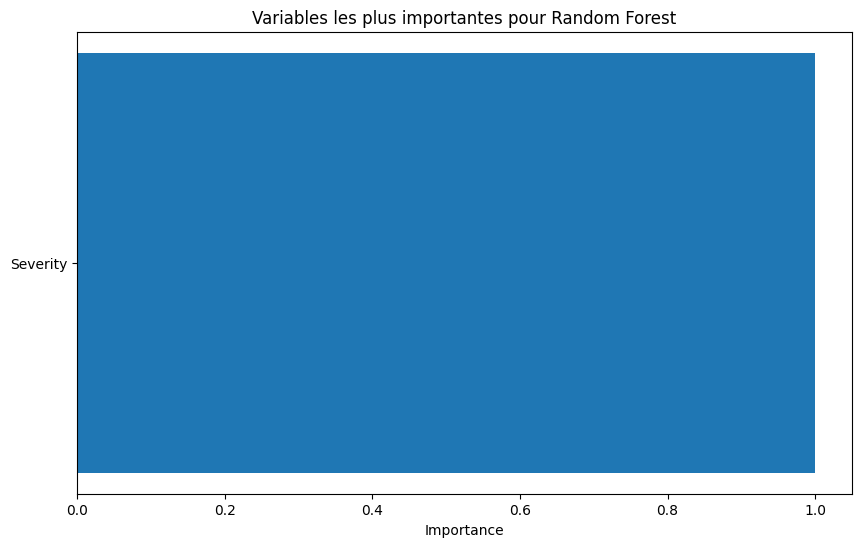

In [ ]:

# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Chargement des données
df = pd.read_csv('/content/drive/MyDrive/TP2MGL870/HDFS/dataset_modifie.csv')

# Étape 1 : Identifier les colonnes valides (événements) et exclure les colonnes non numériques
event_columns = [col for col in df.columns if col.startswith('S') and col not in ['EpochTime', 'EventId', 'EventTemplate']]

# Vérification des colonnes valides
if not event_columns:
    raise ValueError("Aucune colonne d'événement valide n'est disponible. Vérifiez vos données.")
else:
    print(f"Colonnes d'événements utilisées : {event_columns}")

# Caractéristiques et étiquette
X = df[event_columns]  # Colonnes des événements numériques restantes
if 'Severity' not in df.columns:
    raise KeyError("La colonne 'Severity' est absente du DataFrame.")
y = df['Severity']  # L'étiquette de succès ou d'échec

# Encoder les valeurs catégorielles de `Severity`
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Étape 2 : Diviser les données en ensembles d'entraînement, de validation et de test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% pour le test
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)  # 30% du reste pour la validation

# Étape 3 : Imputer les valeurs manquantes par la moyenne
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

# Étape 4 : Standardisation des colonnes d'événements
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Étape 5 : Vérification des tailles des ensembles
print(f"Taille de l'ensemble d'entraînement : {X_train.shape}")
print(f"Taille de l'ensemble de validation : {X_val.shape}")
print(f"Taille de l'ensemble de test : {X_test.shape}")

# Entraîner le modèle RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Importance des caractéristiques
feature_importance = rf.feature_importances_
indices = np.argsort(feature_importance)[::-1]  # Tri des variables par ordre décroissant
features = X.columns  # Utiliser les colonnes de X pour les caractéristiques

# Affichage des 10 variables les plus importantes
plt.figure(figsize=(10, 6))
plt.barh(features[indices][:10], feature_importance[indices][:10])
plt.xlabel('Importance')
plt.title('Variables les plus importantes pour Random Forest')
plt.show()

